In [1]:
import os # OS module in Python provides functions for interacting with the operating system
import pymysql # PyMySQL is an interface for connecting to a MySQL database server from Python
import pandas as pd
import matplotlib.pyplot as plt

# os.getenv method in Python returns the value of the environment variable key
host = os.getenv('MYSQL_HOST') 
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd="Dwayne@21",                                        
    db="fooddb",
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * From fooddb.food_table",conn) # Importing a SQL Data Query into a Pandas DataFrame
df

,Item_No,Food_Item,Category,Size,Woolworths,Stock_Quantity_W,Checkers,Stock_Quantity_C,Pick_n_Pay,Stock_Quantity_P
0,A001,Simba Beef Flavoured Potato Chips,Snacks,125g,18.49,13,15.99,21,15.49,5
1,A002,Lays Salted Potato Chips,Snacks,125g,19.49,11,18.99,18,17.99,16
2,A003,Coca-Cola Original Bottle,Beverages,2L,22.49,6,21.99,33,21.49,25
3,A004,"Fanta Orange Bottle,Beverages",Beverages,2L,22.49,4,19.99,16,19.49,28
4,A005,Cadbury Dairy Milk Chocolate Slab,Chocolates,80g,15.99,19,15.99,30,15.99,26
5,A006,Nestl? Quality Street Chocolates,Chocolates,500g,99.99,6,99.99,12,99.99,5
6,A007,Nescaf? Gold Roasted Coffee,Coffee,200g,109.99,12,109.99,55,109.99,46
7,A008,Jacobs Kr?nung Instant Coffee,Coffee,200g,109.99,15,104.00,21,109.99,58
8,A009,All Gold Tomato Sauce,Sauces,700ml,30.99,2,26.99,26,25.99,9
9,A010,Crosse & Blackwell Mayonnaise,Sauces,750g,33.99,4,31.99,22,29.99,29


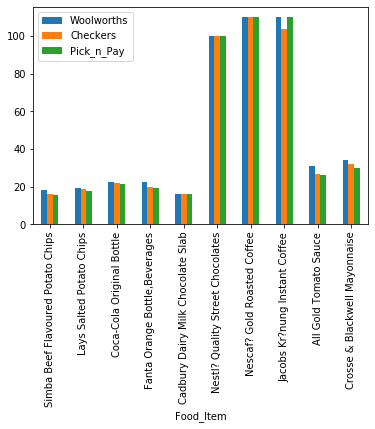

In [2]:
# Comparing prices of each item to the supermarket using a bar graph

df = pd.read_sql_query("SELECT * From fooddb.food_table",conn)
df.plot(x='Food_Item',y=['Woolworths','Checkers','Pick_n_Pay'], kind = 'bar')
plt.show()

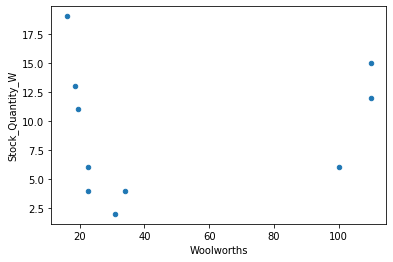

In [3]:
# Illustarting the quantity of stock and the price of Woolworths items using a scatter plot

df = pd.read_sql_query("SELECT * From fooddb.food_table",conn)
df.plot.scatter(x='Woolworths', y='Stock_Quantity_W')

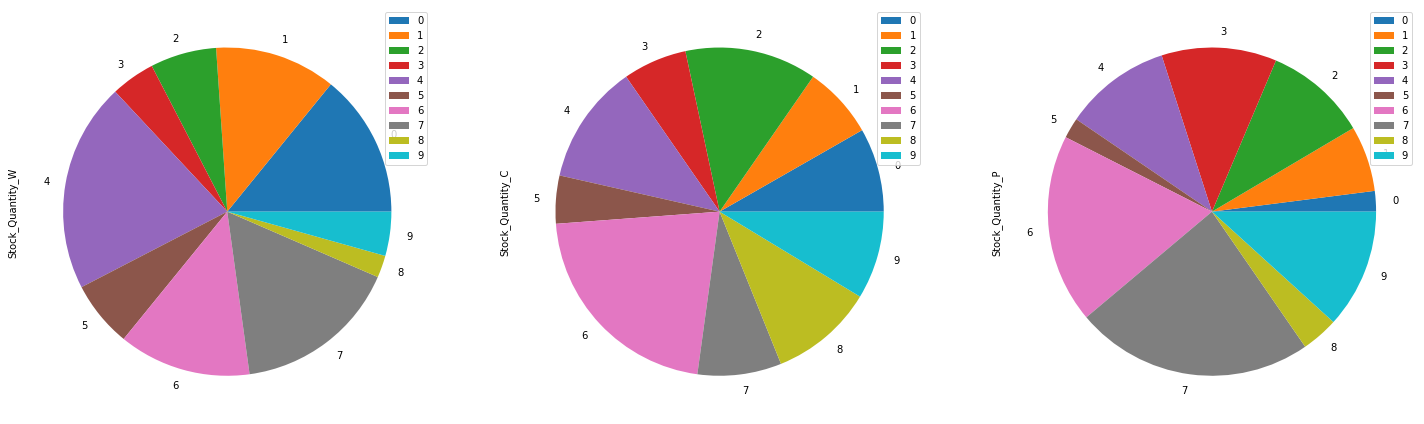

In [4]:
# Comparing the quantity of stock between the 3 supermarkets using a pie graph

df = pd.read_sql_query("SELECT Stock_Quantity_W, Stock_Quantity_C, Stock_Quantity_P From fooddb.food_table",conn)
df.plot(subplots=True, kind = 'pie', figsize=(25, 25))
plt.show()

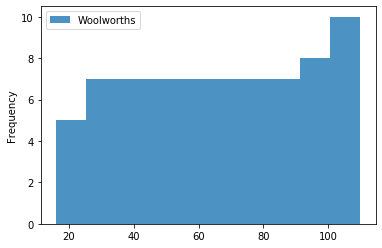

In [5]:
# Plotting Woolworths prices and the amount each price is used, using a histogram

df = pd.read_sql_query("SELECT Woolworths From fooddb.food_table",conn)
df.plot(kind = 'hist', cumulative=True, stacked=True, alpha=0.8)
plt.show()

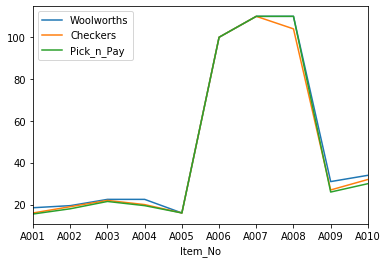

In [6]:
# Comparing the prices of each supermarket using a line graph

df = pd.read_sql_query("SELECT * From fooddb.food_table",conn)
df.plot(x='Item_No',y=['Woolworths','Checkers','Pick_n_Pay'])
plt.show()

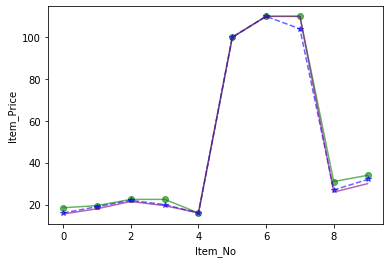

In [7]:
# Comparing the prices of each supermarket using a line graph whilst customising each line to help differentiate each supermarket

df = pd.read_sql_query("SELECT * From fooddb.food_table",conn)
y = df["Woolworths"]
y2 = df["Checkers"]
y3 = df["Pick_n_Pay"]

plt.plot(y, 'go-', y2, 'b*--', y3, 'purple', alpha=0.6)
plt.xlabel('Item_No')
plt.ylabel('Item_Price')
plt.show()